In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("final_df_no_patents.csv")

In [2]:
df.head()

,Unnamed: 0,area,year,gdp,r_d,researchers,human_development_index_(hdi),public_expenditure_education
0,0,Angola,2016,52761617226,0.0,18.8,0.596,2.8
1,1,Azerbaijan,2021,54825411765,0.2,1741.1,0.745,3.5
2,2,Argentina,2005,198737000000,0.4,819.4,0.802,3.9
3,3,Argentina,2010,423627000000,0.6,1123.8,0.834,5.0
4,4,Argentina,2015,594749000000,0.6,1230.5,0.848,5.8


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,area,year,gdp,r_d,researchers,human_development_index_(hdi),public_expenditure_education
0,Angola,2016,52761617226,0.0,18.8,0.596,2.8
1,Azerbaijan,2021,54825411765,0.2,1741.1,0.745,3.5
2,Argentina,2005,198737000000,0.4,819.4,0.802,3.9
3,Argentina,2010,423627000000,0.6,1123.8,0.834,5.0
4,Argentina,2015,594749000000,0.6,1230.5,0.848,5.8


In [5]:
df['area'].unique()

array(['Angola', 'Azerbaijan', 'Argentina', 'Australia', 'Austria',
       'Belgium', 'Brazil', 'Bulgaria', 'Burundi', 'Belarus', 'Cambodia',
       'Canada', 'Sri Lanka', 'Chile', 'China', 'Colombia',
       'Democratic Republic of the Congo', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'El Salvador',
       'Ethiopia', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Iran', 'Ireland', 'Italy', 'Japan',
       'Kazakhstan', 'Kenya', 'South Korea', 'Kuwait', 'Lesotho',
       'Latvia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia',
       'Mali', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mozambique',
       'Namibia', 'Netherlands', 'New Zealand', 'Norway', 'Pakistan',
       'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Senegal', 'Serbia', 'Singapore', 'Viet Nam', 'Slovenia',
       'South Africa', 'Spain', '

In [6]:
european_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 
    'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 
    'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 
    'Lithuania', 'Luxembourg', 'Malta', 'Norway', 'Poland', 'Portugal', 
    'Romania', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
    'Ukraine', 'United Kingdom'
]

In [7]:
all_countries = [
    'Angola', 'Azerbaijan', 'Argentina', 'Australia', 'Austria',
    'Belgium', 'Brazil', 'Bulgaria', 'Burundi', 'Belarus', 'Cambodia',
    'Canada', 'Sri Lanka', 'Chile', 'China', 'Colombia',
    'Democratic Republic of the Congo', 'Costa Rica', 'Croatia',
    'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'El Salvador',
    'Ethiopia', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany',
    'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary',
    'Iceland', 'India', 'Iran', 'Ireland', 'Italy', 'Japan',
    'Kazakhstan', 'Kenya', 'South Korea', 'Kuwait', 'Lesotho',
    'Latvia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia',
    'Mali', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mozambique',
    'Namibia', 'Netherlands', 'New Zealand', 'Norway', 'Pakistan',
    'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Romania',
    'Russia', 'Senegal', 'Serbia', 'Singapore', 'Viet Nam', 'Slovenia',
    'South Africa', 'Spain', 'Eswatini', 'Sweden', 'Switzerland',
    'Thailand', 'Togo', 'United Arab Emirates', 'Tunisia', 'Uganda',
    'Ukraine', 'Egypt', 'United Kingdom', 'Tanzania', 'Uruguay',
    'Uzbekistan'
]

In [8]:
df['education_to_rd_ratio'] = df['public_expenditure_education'] / df['r_d']

In [9]:
european_df = df[df['area'].isin(european_countries)]
non_european_df = df[df['area'].isin(all_countries) & ~df['area'].isin(european_countries)]

In [10]:
print("Check for NaN or Infinite Values:")
print(df[['area', 'public_expenditure_education', 'r_d', 'education_to_rd_ratio']].isnull().sum())
print(df[['area', 'public_expenditure_education', 'r_d', 'education_to_rd_ratio']].describe())

Check for NaN or Infinite Values:
area                            0
public_expenditure_education    0
r_d                             0
education_to_rd_ratio           0
dtype: int64
       public_expenditure_education         r_d  education_to_rd_ratio
count                    210.000000  210.000000             210.000000
mean                       4.715714    1.042857                    inf
std                        1.386259    0.896976                    NaN
min                        1.700000    0.000000               1.031250
25%                        3.800000    0.400000               3.381250
50%                        4.800000    0.700000               5.873016
75%                        5.500000    1.500000              12.533333
max                        9.000000    3.700000                    inf


C:\Users\vasco\Ironhack\labs\Week3\first_project\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [11]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [12]:
problematic_rows = df[df['education_to_rd_ratio'].isna()]
print("\nRows with NaN values in 'education_to_rd_ratio':")
print(problematic_rows)


Rows with NaN values in 'education_to_rd_ratio':
         area  year          gdp  r_d  researchers  \
0      Angola  2016  52761617226  0.0         18.8   
71  Guatemala  2010  40676578423  0.0         24.8   
72  Guatemala  2015  62186064719  0.0         22.2   
74   Honduras  2015  20979791685  0.0         22.4   

    human_development_index_(hdi)  public_expenditure_education  \
0                           0.596                           2.8   
71                          0.605                           2.8   
72                          0.639                           3.0   
74                          0.613                           6.4   

    education_to_rd_ratio  
0                     NaN  
71                    NaN  
72                    NaN  
74                    NaN  


In [13]:
european_df = df[df['area'].isin(european_countries)]
non_european_df = df[df['area'].isin(all_countries) & ~df['area'].isin(european_countries)]

In [14]:
european_df_clean = european_df.dropna(subset=['education_to_rd_ratio'])
non_european_df_clean = non_european_df.dropna(subset=['education_to_rd_ratio'])

In [15]:
european_stats = european_df_clean['education_to_rd_ratio'].describe()
non_european_stats = non_european_df_clean['education_to_rd_ratio'].describe()

In [16]:
print("\nEuropean Countries Stats:")
print(european_stats)

print("\nNon-European Countries Stats:")
print(non_european_stats)


European Countries Stats:
count    91.000000
mean      5.089979
std       3.483981
min       1.593750
25%       2.944297
50%       3.700000
75%       6.437500
max      18.666667
Name: education_to_rd_ratio, dtype: float64

Non-European Countries Stats:
count    115.000000
mean      12.970854
std       12.149111
min        1.031250
25%        4.375000
50%       10.200000
75%       17.500000
max       71.000000
Name: education_to_rd_ratio, dtype: float64


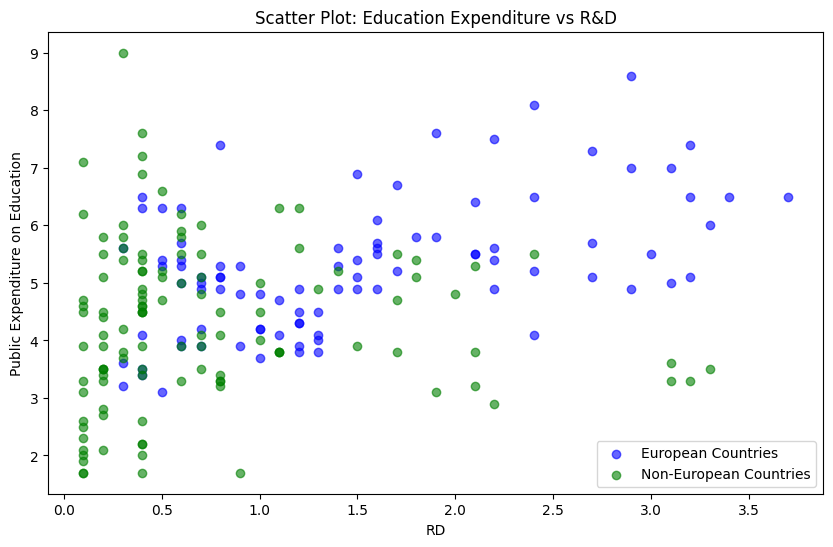

In [25]:
# Plot Education vs GDP as a scatter plot, colored by region
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(european_df_clean['r_d'], european_df_clean['public_expenditure_education'], label='European Countries', color='b', alpha=0.6)
plt.scatter(non_european_df_clean['r_d'], non_european_df_clean['public_expenditure_education'], label='Non-European Countries', color='g', alpha=0.6)

# Add titles and labels
plt.title('Scatter Plot: Education Expenditure vs R&D')
plt.xlabel('RD')
plt.ylabel('Public Expenditure on Education')

# Show legend
plt.legend()

# Show plot
plt.show()


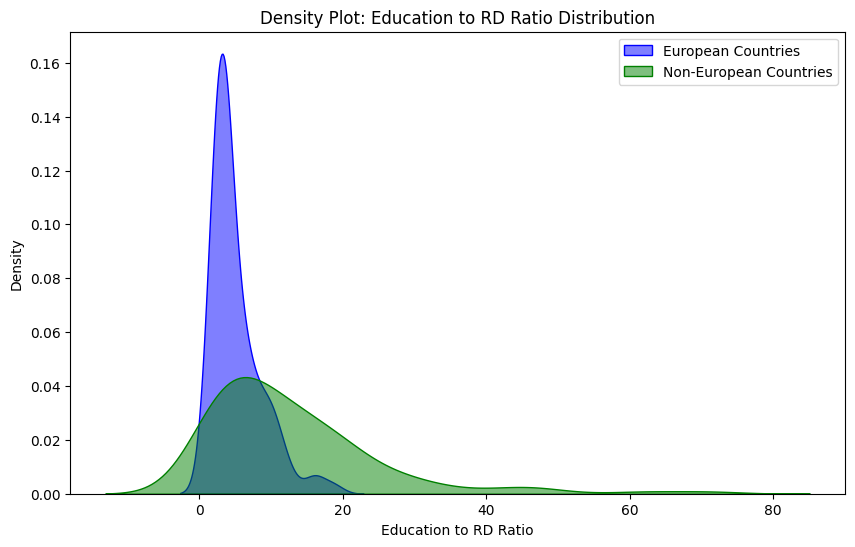

In [24]:
# Plot KDE for European and Non-European countries
plt.figure(figsize=(10, 6))

# KDE plots
sns.kdeplot(european_df_clean['education_to_rd_ratio'], label='European Countries', color='blue', fill=True, alpha=0.5)
sns.kdeplot(non_european_df_clean['education_to_rd_ratio'], label='Non-European Countries', color='green', fill=True, alpha=0.5)

# Add titles and labels
plt.title('Density Plot: Education to RD Ratio Distribution')
plt.xlabel('Education to RD Ratio')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show plot
plt.show()
